---
layout: default
title: "Deep Learning - CNN - 1D/3D generalization"
categories: deeplearning
permalink: /ML42/
order: 42
comments: true
---

In [20]:
%pylab --no-import-all inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
plt.rcParams["mathtext.fontset"] = "cm"
import pandas as pd
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


# 1D and 3D generalization of CNNs
Most of the discussion around ConvNets revolves around images, which can be seen as 2D data. However the CNN principles applie to 1D as well as 3D data.
## 1D data
For example ECG (ElectroCardioGram) data (<a href="#fig:1dconv">figure below</a>, panel B) is one dimensional as it shows a series of measurements along time. So instead of being an $n \times n$ dimensional input it's just an $n$-dimensional input and is convolved with an $f$-dimensional filter in place of an $f \times f$ dimensional filter.

For 1D or sequence data, the set of algorithms that are most employed are **recurrent neural network** (RNN), but in some situations CNNs can be a good if not better alternative for sequence data modelling.

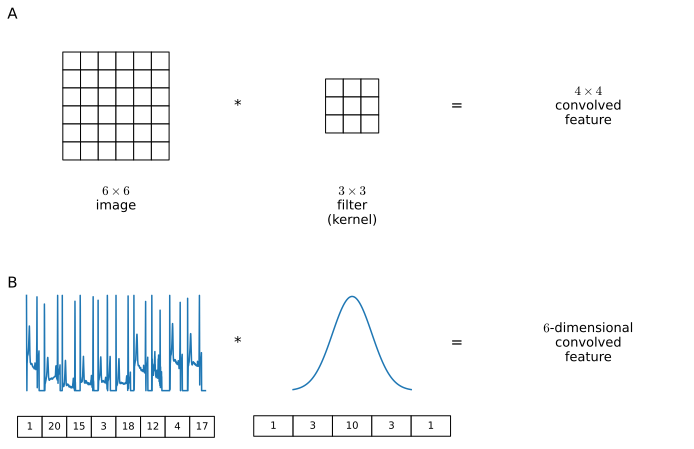

In [90]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
ax1, ax2, ax3, ax4, ax5, ax6 = axes.ravel()
fig.patch.set_visible(False)

tabs = []
t = np.array(list(' '*36)).reshape(6, 6)
tabs.append(ax1.table(t, loc='center', colWidths=[0.06]*6))
ax1.text(0.5, 0.1, '$6\\times 6 $\nimage', va='top', ha='center', transform=ax1.transAxes, fontsize=13)

tabs.append(ax2.table(t[:3, :3], loc='center', colWidths=[0.06]*3))
ax2.text(-.1, 0.5, '*', va='center', ha='left', transform=ax2.transAxes, fontsize=15)
ax2.text(0.5, 0.1, '$3\\times 3$\nfilter\n(kernel)', va='top', ha='center', transform=ax2.transAxes, fontsize=13)

# tabs.append(ax3.table(t[:4, :4], loc='center', colWidths=[0.06]*4))
ax3.text(-.2, 0.5, '=', va='center', ha='left', transform=ax3.transAxes, fontsize=15)
ax3.text(0.5, 0.5, '$4\\times 4 $\nconvolved\nfeature', va='center', ha='center', transform=ax3.transAxes, fontsize=13)

df = pd.read_csv('./data/ecg.csv')
ax4.plot(df.values[:10, 1:].reshape(188*10, ))
ax4.set_aspect(1000)
ax4.table([[1, 20, 15, 3, 18, 12, 4, 17]], bbox=[0, -.2, 1, -0.2], cellLoc='center')

x = np.linspace(0 - 3*1**0.5, 0 + 3*1**0.5, 100)
ax5.plot(x, stats.norm.pdf(x, 0, 1**0.5))
ax5.set_aspect(12)
ax5.set_xlim(-5, 5)
ax5.table([[1, 3, 10, 3, 1]], bbox=[0, -.21, 1, -0.2], cellLoc='center')
ax5.text(-.1, 0.5, '*', va='center', ha='left', transform=ax5.transAxes, fontsize=15)

ax6.text(-.2, 0.5, '=', va='center', ha='left', transform=ax6.transAxes, fontsize=15)
ax6.text(0.5, 0.5, '$6$-dimensional\nconvolved\nfeature', va='center', ha='center', transform=ax6.transAxes, fontsize=13)

plt.text(0, 1, 'A', transform=ax1.transAxes, ha='right', va='top', fontsize=15)
plt.text(0, 1, 'B', transform=ax4.transAxes, ha='right', va='bottom', fontsize=15)

for tab in tabs:
    tab.auto_set_font_size(False)
    tab.set_fontsize(13)
    tab.scale(1.5, 1.5)
    
for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
    ax.axis('off')

<i id="fig:1dconv">A convolution operation on a 2D input (A) and 1D input (B)</i>

## 3D data
CT scans are fundamentally 3-dimensional since a CT scan produces a set of cross-section images of a volume. Suppose we have a 3D volume of $14 \times 14 \times 14$, it can be convolved with an $n_c'$ number of $5 \times 5 \times 5$ filters, to produce a $10 \times 10 \times 10 \times n_c'$ output volume.

A 3D input doesn't necessarily need to represent an actual volume as in the case of CT-scans, it could be for example a movie, where each channel represents a frame. A CNN applied to such data could detect motion or particular type of actions.